## This notebook is used to generate synthetic data 

This notebook is needed to generate well-behaved time series data. Seasonal, trended, white-noise and mixed seasonal and trended data sets are generated to put literature recommended imputation methods to test.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import gauss
import pandas as pd
import numpy as np
from scipy import signal
from sklearn import preprocessing

In [3]:
white_noise = [gauss(0.0, 1.0) for i in range(1000)]

In [4]:
white_noise = pd.DataFrame(white_noise)

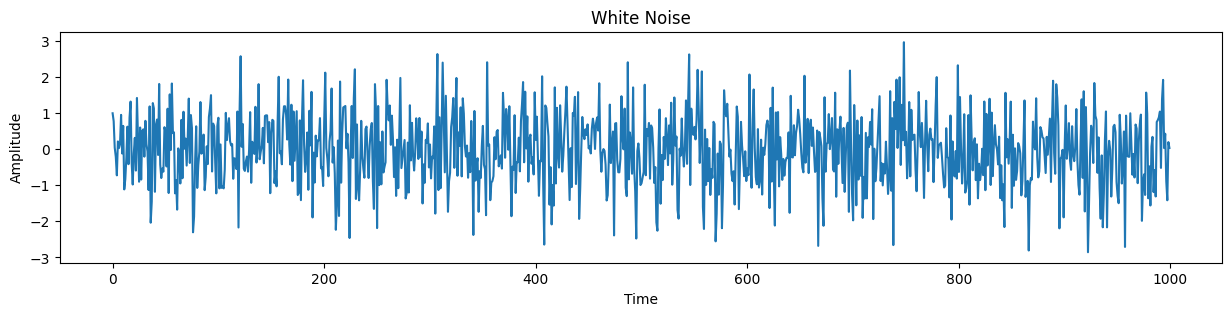

In [5]:
ax = white_noise.plot(figsize=(15,3), title="White Noise", legend=False)
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
white_noise.to_csv('output\white_noise_complete.csv', index = True)

In [11]:
xlim = 100
x = np.arange(0, xlim, 0.1)
y = np.sin(x)*10
seasonal = pd.DataFrame(y)+white_noise

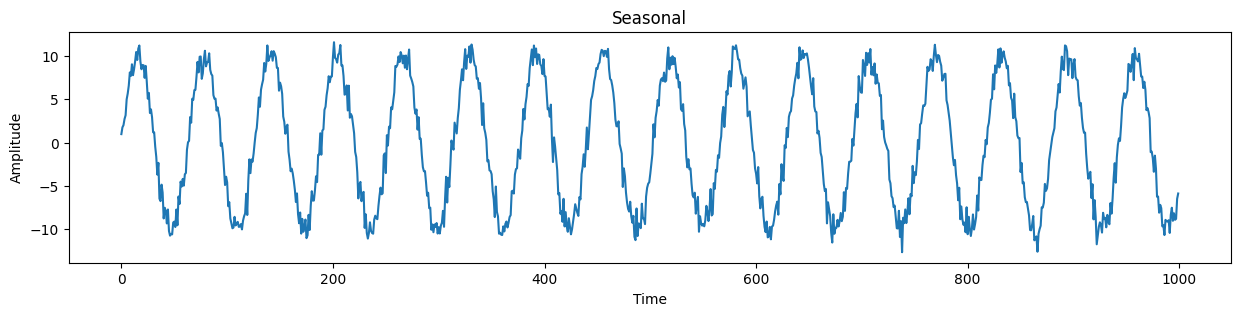

In [12]:
ax = seasonal.plot(figsize=(15,3), title="Seasonal", legend=False)
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
seasonal.to_csv('output/seasonal_complete.csv', index = True)

In [13]:
xlim = 100
x = np.arange(0, xlim, 0.1)
trend = pd.DataFrame(x)+white_noise

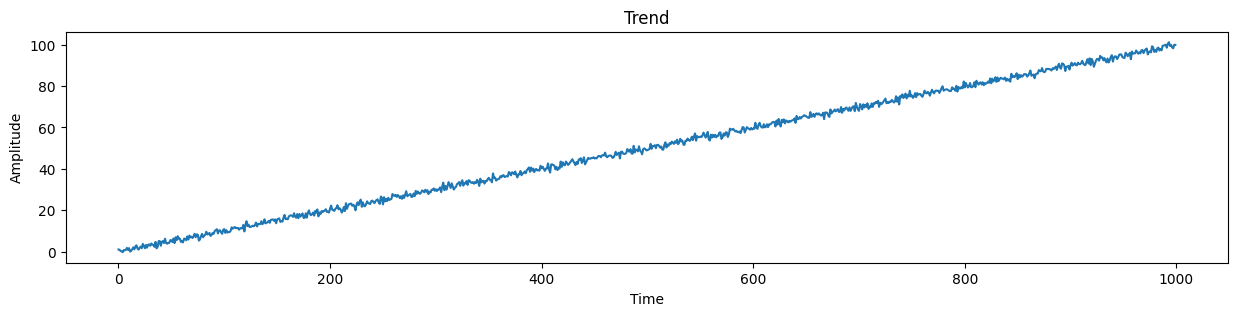

In [14]:
ax = trend.plot(figsize=(15,3), title="Trend", legend=False)
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
seasonal.to_csv('output/trend_complete.csv', index = True)

In [16]:
xlim = 100
x = np.arange(0, xlim, 0.1)
y = np.sin(x)*10
seasonal_and_trend = pd.DataFrame(y)+white_noise*3+pd.DataFrame(x)

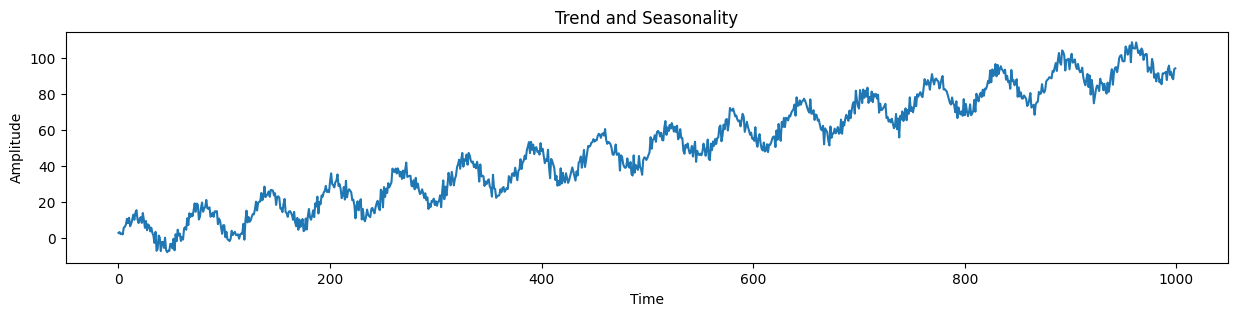

In [17]:
ax = seasonal_and_trend.plot(figsize=(15,3), title="Trend and Seasonality", legend=False)
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
seasonal_and_trend.to_csv('output/seasonal_and_trend_complete.csv', index = True)

In [18]:
seasonal_scaled = preprocessing.scale(seasonal)
trend_scaled = preprocessing.scale(trend)
seasonal_and_trend_scaled = preprocessing.scale(seasonal_and_trend)
white_noise_scaled = preprocessing.scale(white_noise)

In [19]:
seasonal_scaled_ac = signal.correlate(seasonal_scaled, seasonal_scaled, mode='full')
trend_scaled_ac = signal.correlate(trend_scaled, trend_scaled, mode='full')
seasonal_and_trend_scaled_ac = signal.correlate(seasonal_and_trend_scaled, seasonal_and_trend_scaled, mode='full')
white_noise_scaled_ac = signal.correlate(white_noise_scaled, white_noise_scaled, mode='full')

seasonal_scaled_ac = seasonal_scaled_ac[999:]
trend_scaled_ac = trend_scaled_ac[999:]
seasonal_and_trend_scaled_ac = seasonal_and_trend_scaled_ac[999:]
white_noise_scaled_ac = white_noise_scaled_ac[999:]

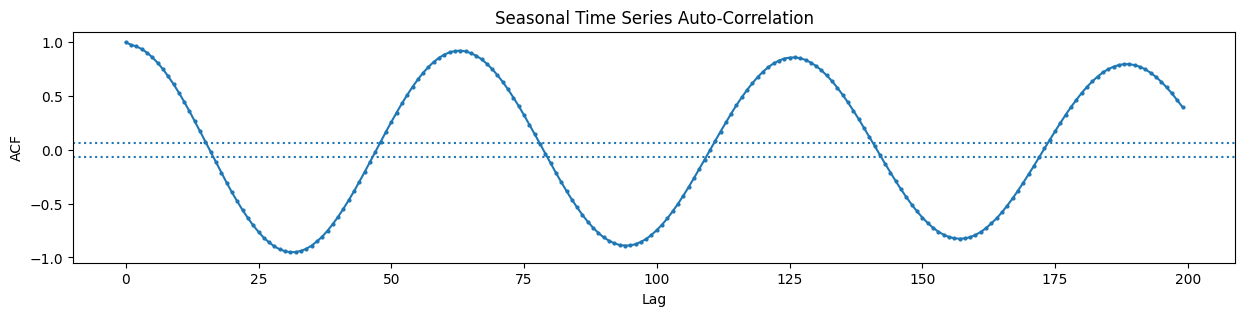

In [20]:
plt.figure(figsize=(15,3))
plt.plot((seasonal_scaled_ac/len(seasonal_scaled))[0:200], 'o-', markersize=2)
plt.axhline(2/np.sqrt(len(seasonal_scaled)), ls=':')
plt.axhline(-2/np.sqrt(len(seasonal_scaled)), ls=':')
plt.title('Seasonal Time Series Auto-Correlation')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

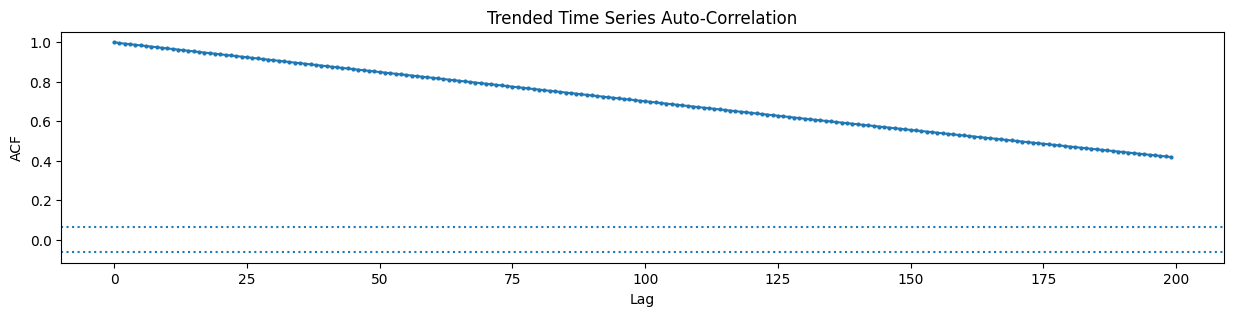

In [21]:
plt.figure(figsize=(15,3))
plt.plot((trend_scaled_ac/len(trend_scaled))[0:200], 'o-', markersize=2)
plt.axhline(2/np.sqrt(len(trend_scaled)), ls=':')
plt.axhline(-2/np.sqrt(len(trend_scaled)), ls=':')
plt.title('Trended Time Series Auto-Correlation')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

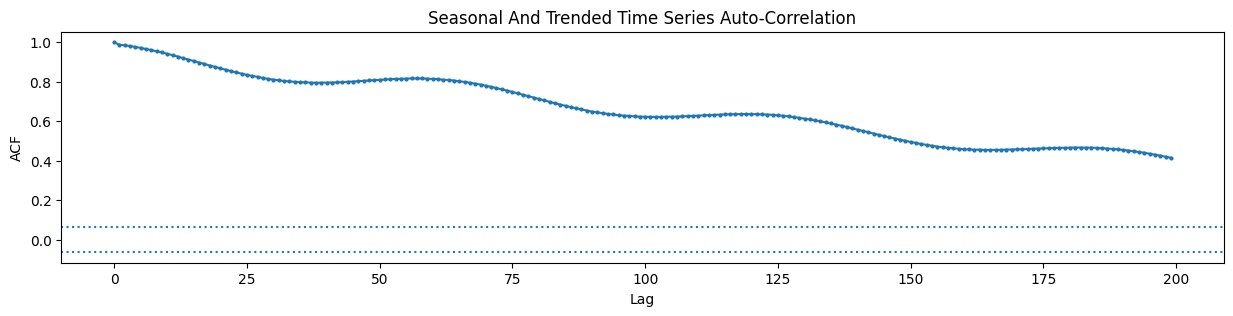

In [22]:
plt.figure(figsize=(15,3))
plt.plot((seasonal_and_trend_scaled_ac/len(seasonal_and_trend_scaled_ac))[0:200], 'o-', markersize=2)
plt.axhline(2/np.sqrt(len(seasonal_and_trend_scaled)), ls=':')
plt.axhline(-2/np.sqrt(len(seasonal_and_trend_scaled)), ls=':')
plt.title('Seasonal And Trended Time Series Auto-Correlation')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

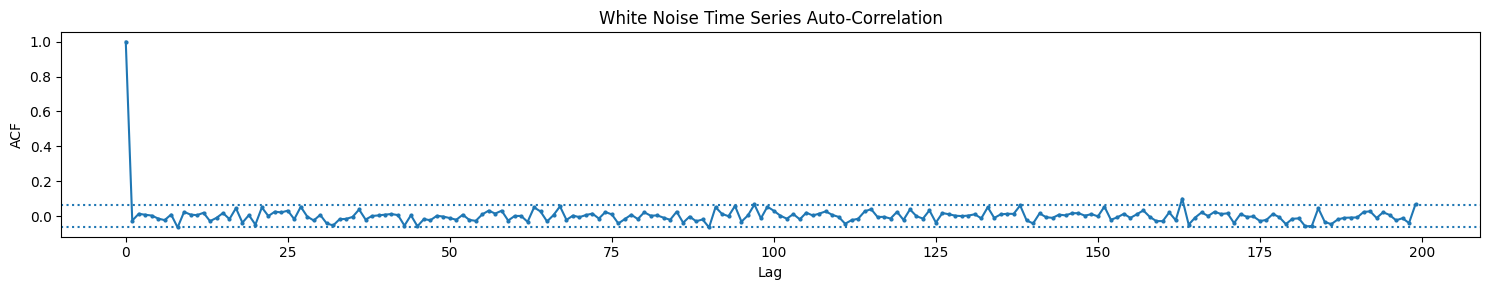

In [23]:
plt.figure(figsize=(15,3))
plt.plot((white_noise_scaled_ac/len(white_noise_scaled))[0:200], 'o-', markersize=2)
plt.axhline(2/np.sqrt(len(white_noise_scaled)), ls=':')
plt.axhline(-2/np.sqrt(len(white_noise_scaled)), ls=':')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.title('White Noise Time Series Auto-Correlation')
plt.tight_layout()
plt.show()